                     InvoiceDate         Product  Quantity  UnitPrice Region  \
0  2023-01-01 00:00:00.000000000        Keyboard         6        150   East   
1  2023-01-01 11:41:16.050700466      Headphones         2       1800  North   
2  2023-01-01 23:22:32.101400933  Wireless Mouse         4        450   West   
3  2023-01-02 11:03:48.152101400      Headphones         3       1800   West   
4  2023-01-02 22:45:04.202801867      Headphones         5       1200   East   

  CustomerID  
0      C0186  
1      C0252  
2      C0355  
3      C0238  
4      C0360  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InvoiceDate  1500 non-null   object
 1   Product      1500 non-null   object
 2   Quantity     1500 non-null   int64 
 3   UnitPrice    1500 non-null   int64 
 4   Region       1500 non-null   object
 5   CustomerID   1500 non-null   ob

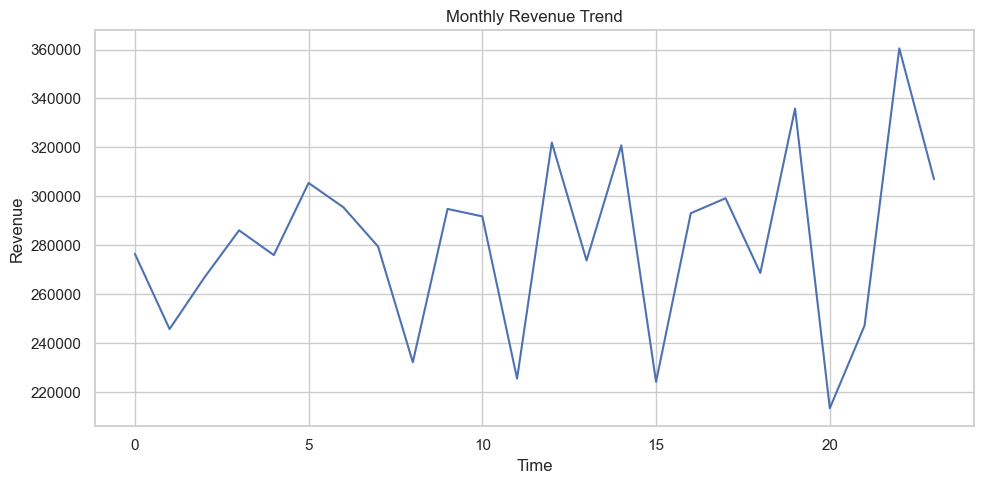

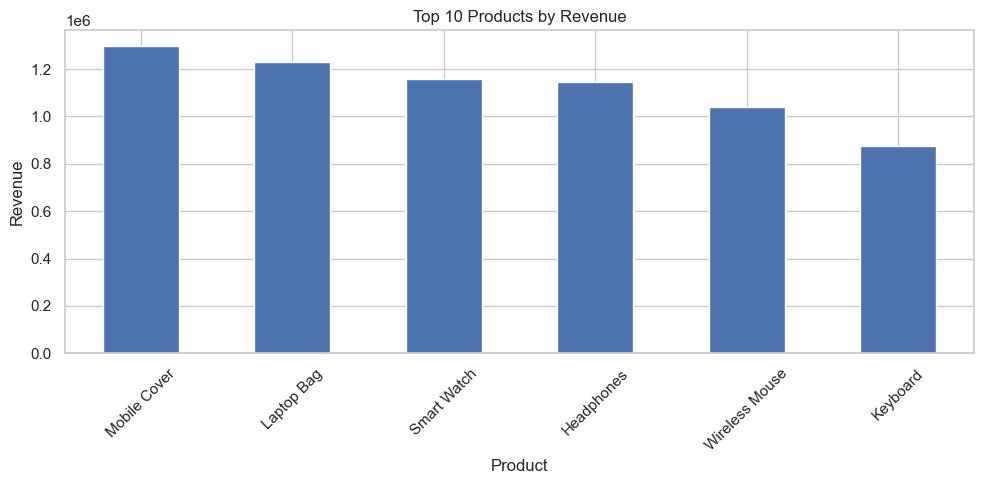

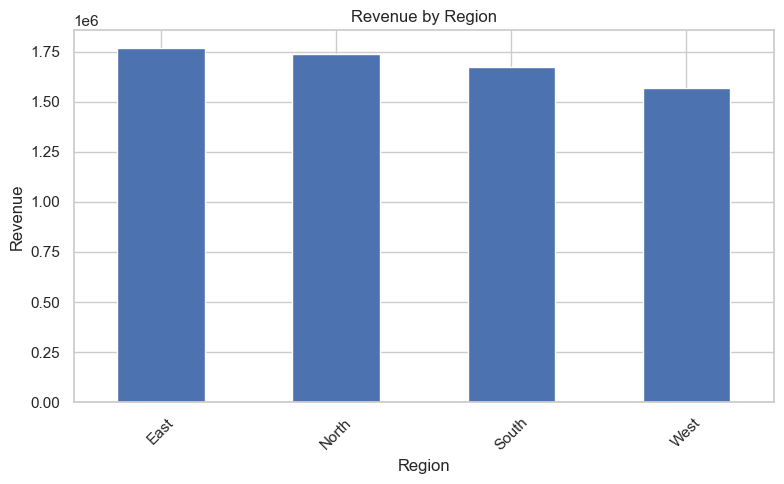

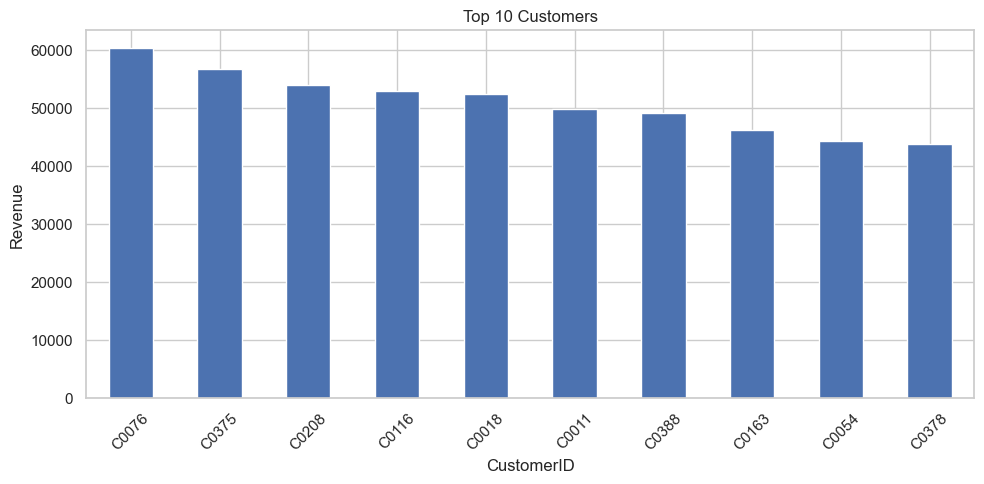

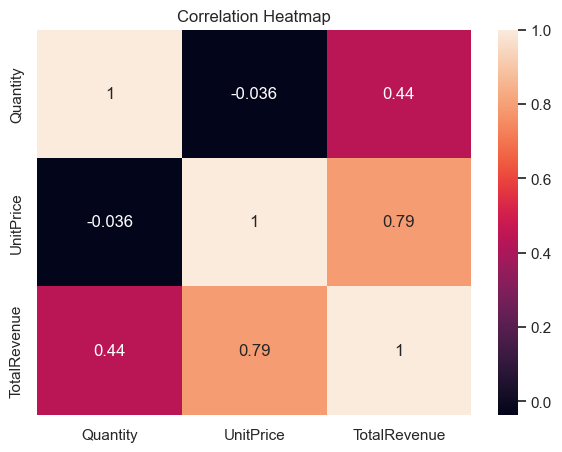


--- Quick Insights ---
• Revenue increases during certain months (seasonal trend).
• Few products generate most of the revenue.
• Some regions perform much better than others.
• A small number of customers bring high revenue.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# create images folder if not exists
os.makedirs("images", exist_ok=True)

sns.set(style="whitegrid")

# loading dataset
df = pd.read_csv("sales_data.csv")
print(df.head())
print(df.info())

# checking missing values
print(df.isnull().sum())

# fixing missing values if any
df['Quantity'] = df['Quantity'].fillna(0)
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].median())

# converting date column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# removing duplicate rows
df.drop_duplicates(inplace=True)

# creating a new column for revenue
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

# extracting month and year
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year


# -----------------------
# Monthly Revenue Trend
# -----------------------
monthly = df.groupby(['Year','Month'])['TotalRevenue'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly['TotalRevenue'])
plt.title("Monthly Revenue Trend")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("images/monthly_revenue.png")
plt.show()


# -----------------------
# Top 10 Products
# -----------------------
top_products = df.groupby('Product')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/top_products.png")
plt.show()


# -----------------------
# Region-wise Revenue
# -----------------------
region_rev = df.groupby('Region')['TotalRevenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_rev.plot(kind='bar')
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/region_revenue.png")
plt.show()


# -----------------------
# Top 10 Customers
# -----------------------
top_customers = df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/top_customers.png")
plt.show()


# -----------------------
# Correlation Heatmap
# -----------------------
plt.figure(figsize=(7,5))
sns.heatmap(df[['Quantity','UnitPrice','TotalRevenue']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.savefig("images/correlation_heatmap.png")
plt.show()


# quick insights
print("\n--- Quick Insights ---")
print("• Revenue increases during certain months (seasonal trend).")
print("• Few products generate most of the revenue.")
print("• Some regions perform much better than others.")
print("• A small number of customers bring high revenue.")
